<a href="https://colab.research.google.com/github/TrongHvDev/AI/blob/main/week12_preTrained/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100

In [ ]:
(X_train, y_train),(X_test, y_test) = cifar100.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train = X_train.reshape(50000, 32, 32, 3)
X_test = X_test.reshape(10000, 32, 32, 3)
X_train.shape
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train = X_train.astype('float32') /255
X_test = X_test.astype('float32') /255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras import losses
from keras.preprocessing.image import ImageDataGenerator

batch_size = 64
epochs = 40
classes = 100
loss = losses

In [ ]:
# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Add Dropout to cancel learning
# model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add Dropout to cancel learning
# model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add Dropout to cancel learning
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

In [ ]:
# ANN model
model.add(Flatten())
# model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
# Add Dropout to cancel learning
# model.add(Dropout(0.25))
model.add(Dense(classes, activation='softmax'))

In [ ]:
from keras import optimizers
model.compile(loss = loss.categorical_crossentropy, optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 2, 2, 128)      

In [ ]:
# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True)
datagen.fit(X_train)

In [ ]:
train = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/40
782/782 [==============================] - 8s 7ms/step - loss: 3.9190 - accuracy: 0.0990 - val_loss: 3.4893 - val_accuracy: 0.1754
Epoch 2/40
782/782 [==============================] - 4s 6ms/step - loss: 3.2805 - accuracy: 0.2070 - val_loss: 3.2007 - val_accuracy: 0.2253
Epoch 3/40
782/782 [==============================] - 5s 6ms/step - loss: 2.9582 - accuracy: 0.2676 - val_loss: 2.9029 - val_accuracy: 0.2844
Epoch 4/40
782/782 [==============================] - 5s 6ms/step - loss: 2.7384 - accuracy: 0.3108 - val_loss: 2.8381 - val_accuracy: 0.2957
Epoch 5/40
782/782 [==============================] - 4s 6ms/step - loss: 2.5764 - accuracy: 0.3445 - val_loss: 2.7082 - val_accuracy: 0.3234
Epoch 6/40
782/782 [==============================] - 5s 6ms/step - loss: 2.4550 - accuracy: 0.3717 - val_loss: 2.5737 - val_accuracy: 0.3514
Epoch 7/40
782/782 [==============================] - 5s 6ms/step - loss: 2.3416 - accuracy: 0.3948 - val_loss: 2.5125 - val_accuracy: 0.3664
Epoch 

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 3.5557 - accuracy: 0.3660
Test accuracy: 0.3659999966621399


In [ ]:
model.save('/content/drive/MyDrive/AI/Backup_AI/cifar100_CNN.h5')

<Axes: >

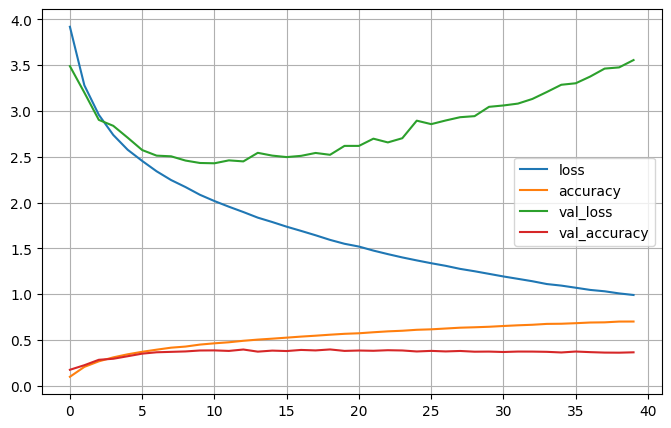

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(train.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca()

1/1 [==============================] - 0s 22ms/step


array([82])

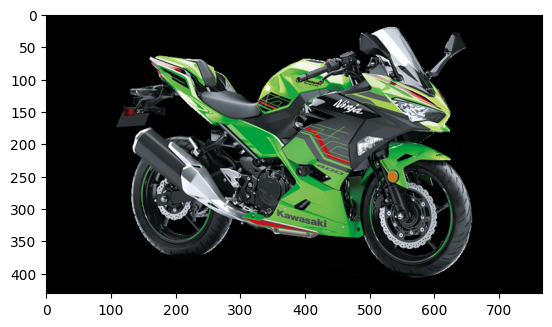

In [ ]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

img1 = load_img('moto1.png')
plt.imshow(img1)

img = load_img('moto1.png', target_size = (32,32))
img = img_to_array(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)